In [148]:
import pandas as pd
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import  pickle

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture

In [149]:
sc = pickle.load(open('pipe_sc.m','rb'))
mm = pickle.load(open('pipe_mm.m','rb'))
pca =pickle.load(open('pipe_pca.m','rb'))
mds = pickle.load(open('pipe_mds.m','rb'))
cl = pickle.load(open('cluster.m','rb'))

In [150]:
X = pd.read_csv('AAPAMGOG.csv')
X = X.drop(['Date'],axis=1)
mm1 = MinMaxScaler()
mm1.fit(X)
dfm = pd.DataFrame(mm1.transform(X),columns=X.columns)

In [179]:
W = pd.DataFrame()
for i in range(9):
    #W['AAPL{}'.format(i)] = list(X.iloc[i*30:292+i*30]['AAPL'])
    W['AMZN{}'.format(i)] = list(X.iloc[i*30:292+i*30]['AMZN'])
    #W['GOOGL{}'.format(i)] = list(X.iloc[i*30:292+i*30]['GOOGL'])
mm1 = MinMaxScaler()
mm1.fit(W)
Wm = pd.DataFrame(mm1.transform(W),columns=W.columns)
Wm.head()

,AMZN0,AMZN1,AMZN2,AMZN3,AMZN4,AMZN5,AMZN6,AMZN7,AMZN8
0,0.413815,0.023681,0.018417,0.083036,0.021027,0.142301,0.146372,0.139148,0.027032
1,0.405267,0.000000,0.030351,0.058004,0.000000,0.147544,0.169160,0.097512,0.015877
2,0.402222,0.025763,0.017312,0.060316,0.045900,0.148293,0.204969,0.100596,0.011269
3,0.336218,0.089778,0.000000,0.012220,0.067065,0.156324,0.207483,0.075468,0.023009
4,0.333841,0.072707,0.039142,0.019033,0.067120,0.160279,0.191708,0.138141,0.030456


In [180]:
%%time
def dias(H):
    y = 0
    for i in range(1,len(H)):
        if (H[i-1]< H[i]):
            y = y + 1     
    return y
def ren(Data):
    y = []
    for i in range(1,len(Data)):
        y.append((Data[i]-Data[i-1])/Data[i-1])   
    return np.mean(y)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 31 µs


In [181]:
%%time
Z = pd.DataFrame(columns=W.columns)
Z = Z.T
Z['Media'] = Wm.mean()
Z['Std'] = Wm.std()  
d = []
r = []
for col in W.columns:
    d.append(dias(Wm[col]))
    r.append(ren(W[col]))
Z['Dias'] = d
Z['r'] = r

CPU times: user 740 ms, sys: 16 ms, total: 756 ms
Wall time: 828 ms


In [182]:
Z= Z.fillna(Z.mean())
Z.head()

,Media,Std,Dias,r
AMZN0,0.625688,0.256486,164,0.001157
AMZN1,0.577078,0.236321,166,0.001875
AMZN2,0.488652,0.207437,169,0.001856
AMZN3,0.407682,0.270353,167,0.001194
AMZN4,0.441962,0.258602,164,0.001136


In [183]:
Zmm = pd.DataFrame(mm.transform(Z),columns= Z.columns)
Zs = pd.DataFrame(sc.transform(Z),columns=Z.columns)
Zp = pd.DataFrame(pca.transform(Zs),columns=['p1','p2'])

In [184]:
Zp['cl']=Zmm['cl'] =Zp['cl'] =Z['cl']= cl.predict(Zmm)

In [186]:
Zp['n']= Z.index

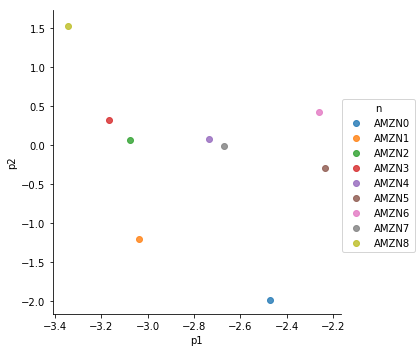

In [187]:
sns.lmplot(data=Zp,x='p1',y='p2',fit_reg=False,hue='n')